In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import locomotif.locomotif as lcm
import locomotif.locomotif_dok as lcm_dok
import locomotif.catalogue_of_constraints as cat

import locomotif.visualize as visualize
import matplotlib.pyplot as plt

## Load data:

In [2]:
f = open(os.path.join(".", "example", "datasets", "mitdb_patient214.csv"))
ts = np.array([line.split(',') for line in f.readlines()], dtype=np.double)

print(ts.shape)

(3600, 2)


In [3]:
ts = (ts - np.mean(ts, axis=None)) / np.std(ts, axis=None)

## Apply LoCoMotif without domain knowledge:

In [4]:
motif_sets = lcm.apply_locomotif(ts, l_min=216, l_max=360, rho=0.6)

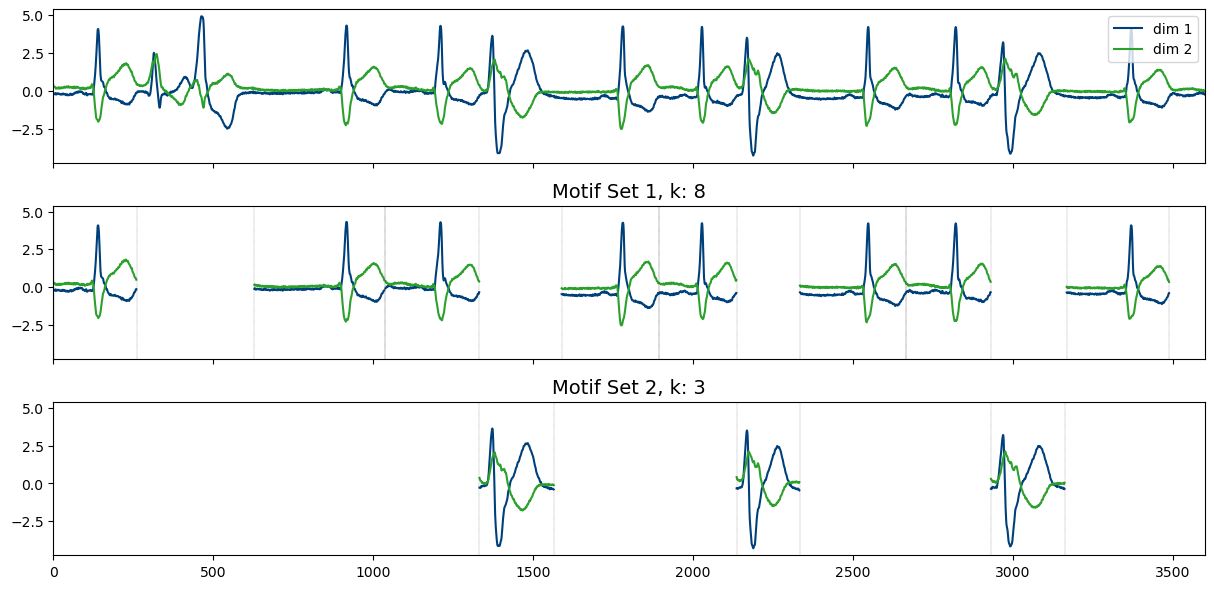

In [5]:
fig, ax = visualize.plot_motif_sets(ts, motif_sets)
plt.show()

## Apply LoCoMotif-DoK without domain knowledge:

In [6]:
motif_sets = lcm_dok.apply_locomotifdok(ts, l_min=216, l_max=360, rho=0.6)

Applying LoCoMotif-DoK with the same constraints for all (pairs of) motif sets...

Applying LoCo...
 • Cumulative similarities computed in 00:00:01 sec.
 • Local warping paths found in 00:00:01 sec.

Searching for None motif sets...
 • Discovered motif set 1 with cardinality k = 8 and weighted fitness 0.6988 in 00:00:02 sec.
 • Discovered motif set 2 with cardinality k = 3 and weighted fitness 0.1988 in 00:00:00 sec.
LoCoMotif-DoK completed in 00:00:05 sec.


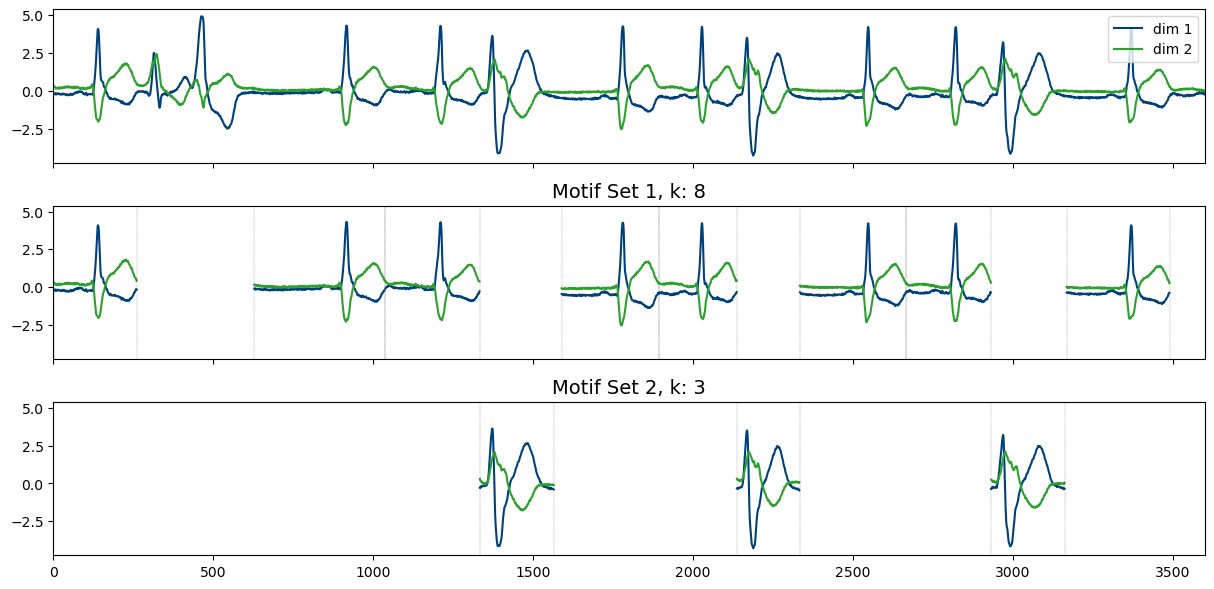

In [7]:
fig, ax = visualize.plot_motif_sets(ts, motif_sets)
plt.show()

## Apply LoCoMotif-DoK with domain knowledge:

In [8]:
# Add hard constraints on cardinalities of the two motif sets to be discovered:
h_mset_all = [cat.h_mset_cardinality_min_max(3, 7), 
              cat.h_mset_cardinality_min_max(5, 10)]

In [9]:
motif_sets = lcm_dok.apply_locomotifdok(ts, l_min=216, l_max=360, rho=0.6, 
                                        h_mset_all=h_mset_all)

Applying LoCoMotif-DoK with different constraints for (pairs of) motif sets...

Applying LoCo...
 • Cumulative similarities computed in 00:00:01 sec.
 • Local warping paths found in 00:00:01 sec.

Searching for 2 motif sets...
 • Discovered motif set 2 with cardinality k = 8 and weighted fitness 0.6988 in 00:00:05 sec.
 • Discovered motif set 1 with cardinality k = 3 and weighted fitness 0.1988 in 00:00:00 sec.
LoCoMotif-DoK completed in 00:00:08 sec.


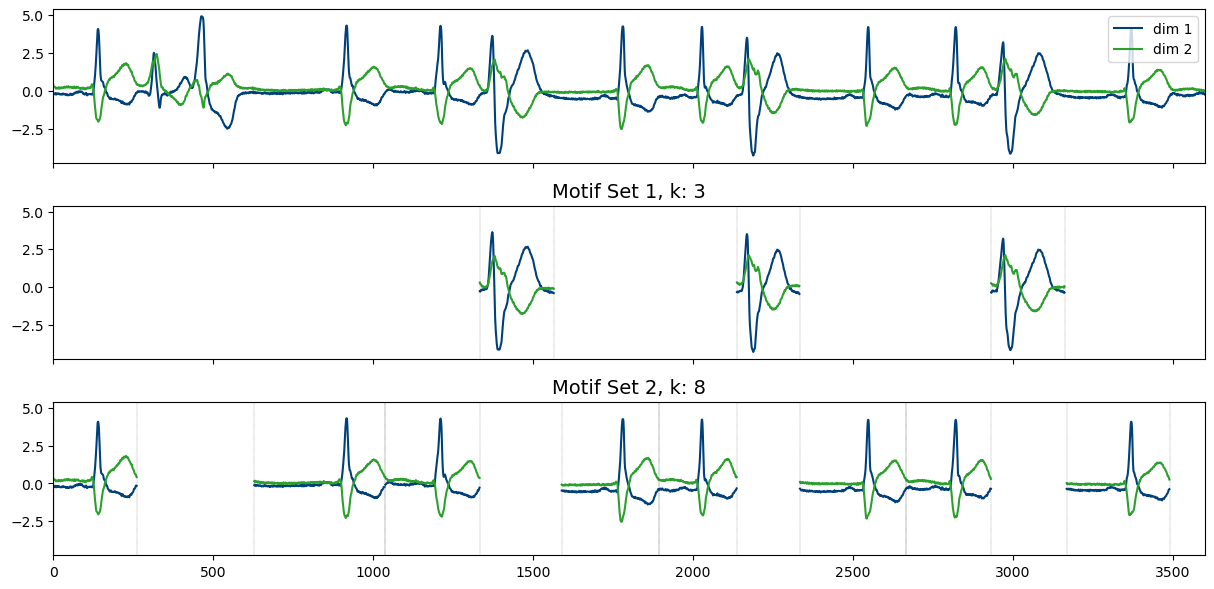

In [10]:
fig, ax = visualize.plot_motif_sets(ts, motif_sets)
plt.show()